In [17]:
from math import log

class DecisionTree:
    trainData = []
    trainLabel = []
    featureValues = {}
    
    #计算数据集中，每个标签出现的次数 
    def labelCount(self, dataset): 
        labelCount = {} 
        for i in dataset: 
            if trainLabel[i] in labelCount.keys(): 
                labelCount[trainLabel[i]] += 1 
            else: 
                labelCount[trainLabel[i]] = 1 
        return labelCount
    
    
    def createTree(self, dataset, features): 
            labelCount = self.labelCount(dataset) 
            #如果特征集为空，则该树为单节点树 #计算数据集中出现次数最多的标签 
            if not features: 
                return max(list(labelCount.items()),key = lambda x:x[1])[0]
            
            #如果数据集中，只包同一种标签，则该树为单节点树 
            if len(labelCount) == 1: 
                return labelCount.keys()[0] 
            
            #计算特征集中每个特征的信息增益
            l = map(lambda x : [x, self.caculateGain(dataset=dataset, feature=x)], features) 
            
            #选取信息增益最大的特征 
            feature, gain = max(l, key = lambda x: x[1]) 
            
            #如果最大信息增益小于阈值，则该树为单节点树 # 
            if self.threshold > gain: 
                return max(list(labelCount.items()),key = lambda x:x[1])[0] 
            tree = {} 
            
            #选取特征子集 
            subFeatures = filter(lambda x : x != feature, features) 
            tree['feature'] = feature 
            
            #构建子树 
            for value in self.featureValues[feature]: 
                subDataset = self.splitDataset(dataset=dataset, feature=feature, value=value) 
            
            #保证子数据集非空 
                if not subDataset: 
                    continue 
                tree[value] = self.createTree(dataset=subDataset, features=subFeatures)
            return tree 
    
    def __init__(self, trainData, trainLabel, threshold):
        self.loadData(trainData, trainLabel) 
        self.threshold = threshold 
        self.tree = self.createTree(range(0,len(trainLabel)), range(0,len(trainData[0])))
     #加载数据
    def loadData(self, trainData, trainLabel):
        if len(trainData) != len(trainLabel): 
            raise ValueError('input error') 
        self.trainData = trainData 
        self.trainLabel = trainLabel 
        
        #计算 featureValues 
        for data in trainData: 
            for index, value in enumerate(data): 
                if not index in self.featureValues.keys(): 
                    self.featureValues[index] = [value] 
                if not value in self.featureValues[index]: 
                    self.featureValues[index].append(value)

    #计算信息熵 
    def caculateEntropy(self, dataset): 
        labelCount = self.labelCount(dataset) 
        size = len(dataset)
        result = 0 
        for i in labelCount.values(): 
            pi = i / float(size) 
            result -= pi * (log(pi) /log(2)) 
        return result
        
    #计算信息增益 
    def caculateGain(self, dataset, feature): 
        values = self.featureValues[feature] #特征feature 所有可能的取值 
        result = 0 
        for v in values:
            subDataset = self.splitDataset(dataset=dataset, feature=feature, value=v) 
            result += len(subDataset) / float(len(dataset)) * self.caculateEntropy(subDataset) 
        return self.caculateEntropy(dataset=dataset) - result 

        

        
        
    def splitDataset(self, dataset, feature, value): 
        reslut = []
        for index in dataset: 
            if self.trainData[index][feature] == value: reslut.append(index) 
        return reslut
        
    def classify(self, data): 
        def f(tree, data):
            if type(tree) != dict:
                return tree 
            else:
                return f(tree[data[tree['feature']]], data) 
        return f(self.tree, data)


In [19]:
def First():
    trainData = [[2,1,1,1],
                 [2,1,2,1],
                 [2,1,3,1],
                 [1,1,1,1],
                 [1,1,3,1],
                 [3,2,1,1],
                 [3,2,3,1],
                 [3,1,1,2],
                 [3,3,3,2],
                 [3,1,2,2],
                 [1,3,2,2],
                 [1,3,3,2],
                 [2,2,1,1],
                 [2,2,3,1],
                 [2,3,1,2],
                 [2,3,3,2],
                 [3,2,1,2],
                 [3,2,3,2],
                 [2,2,3,2],
                 [2,2,2,2],
                 [1,2,2,1],
                 [1,2,3,1],
                 [1,1,1,2],
                 [3,2,2,1]]
    trainLabel = [0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1,0]
    return trainData,trainLabel

In [25]:
def Second():
    trainData = [
        [2,1,2,1,1],
        [2,0,3,3,1],
        [2,1,3,2,2],
        [2,1,2,1,3],
        [2,0,2,2,2],
        [2,1,1,3,3],
        [2,0,2,2,3],
        [2,0,2,1,1],
        [3,1,1,1,1],
        [3,1,2,2,2],
        [3,0,2,3,3],
        [3,0,1,3,3],
        [1,1,3,2,2],
        [1,0,3,2,2],
        [1,1,2,1,3],
        [1,0,3,1,1]
    ]
    trainLabel = [1,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1]
    return trainData,trainLabel

第一题
第一题：feature 0 为 DQ feature 1 为JZZY feature 2 为YJZJ feature 3 为YJHF
生成的决策树为：
{1: 1, 2: {1: 0, 2: 1, 'feature': 3}, 3: {1: {1: 1, 2: 0, 'feature': 2}, 2: 0, 3: 0, 'feature': 1}, 'feature': 0}
可视化结果为：


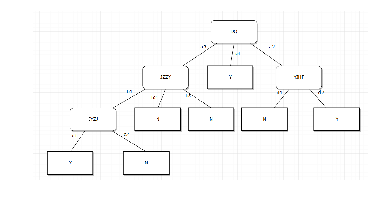

VIP的一般规则集为 DQ:a1，DQ a2 YJHF d2，DQ a3 JZZY b1 JYZJ c1

第二题
生成的决策树为：
学历=研究生 1，本科 2，专科 3
性别=男 1 女 0
外语水平= 四级以下1 四级2 六级3
性格特征= a1 1 ，a2 2 ，a3 3
岗位性质=b1 1，b2 2，b3 3
{1: {1: 0, 2: 1, 3: {1: 1, 2: 0, 'feature': 0}, 'feature': 2}, 2: 1, 3: {1: {1: 0, 2: 1, 'feature': 0}, 2: 0, 3: 1, 'feature': 3}, 'feature': 4}
可视化结果为：


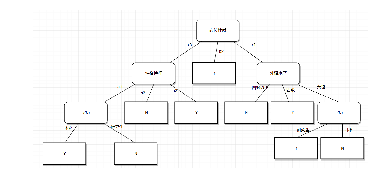

一般集为 岗位性质b2，岗位性质b1 外语水平四级，岗位性质b1 外语水平六级 学历研究生，岗位性质b3 性格特征a3， 岗位性质b3 性格特征a1 学历本科


In [44]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

if __name__ == '__main__': 
    
    #第一题
    print '第一题'
    trainData , trainLabel = First()
    
    tree = DecisionTree(trainData=trainData, trainLabel=trainLabel, threshold=0)
    print u'第一题：feature 0 为 DQ feature 1 为JZZY feature 2 为YJZJ feature 3 为YJHF'
    print u'生成的决策树为：'
    print tree.tree
    print u'可视化结果为：'
    lena = mpimg.imread('1.PNG')
    plt.imshow(lena) # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.show()
    print u'VIP的一般规则集为 DQ:a1，DQ a2 YJHF d2，DQ a3 JZZY b1 JYZJ c1'
    
    
    #第二题
    print ''
    print '第二题'
    print u'生成的决策树为：'
    print u'学历=研究生 1，本科 2，专科 3'
    print u'性别=男 1 女 0'
    print u'外语水平= 四级以下1 四级2 六级3'
    print u'性格特征= a1 1 ，a2 2 ，a3 3'
    print u'岗位性质=b1 1，b2 2，b3 3'
    
    trainData , trainLabel = Second()

    tree = DecisionTree(trainData=trainData, trainLabel=trainLabel, threshold=0)
    print tree.tree
    print u'可视化结果为：'
    lena = mpimg.imread('2.PNG')
    plt.imshow(lena) # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.show()
    print u'一般集为 岗位性质b2，岗位性质b1 外语水平四级，岗位性质b1 外语水平六级 学历研究生，岗位性质b3 性格特征a3， 岗位性质b3 性格特征a1 学历本科'